In [1]:
from gf_utils.stc_data import get_stc_data
import pandas as pd
import numpy as np
stc = get_stc_data(stc_dir='../data/ch/stc',subset='enemy_standard_attribute')
std_attr = stc['enemy_standard_attribute']
df_attr = pd.DataFrame.from_records(std_attr)

In [2]:
standard_level = df_attr.iloc[99]
df_rel_attr = pd.DataFrame()
for k in standard_level.keys():
    if k=='level':
        df_rel_attr[k] = df_attr[k]%10000
        df_rel_attr['type'] = df_attr[k]//10000
    else:
        df_rel_attr[k] = df_attr[k]/standard_level[k]

In [3]:
groups = [df_rel_attr.groupby('type').get_group(i) for i in range(7)]

In [4]:
print(standard_level.keys())

Index(['level', 'maxlife', 'pow', 'dodge', 'hit', 'armor_piercing', 'armor',
       'shield', 'def', 'def_break'],
      dtype='object')


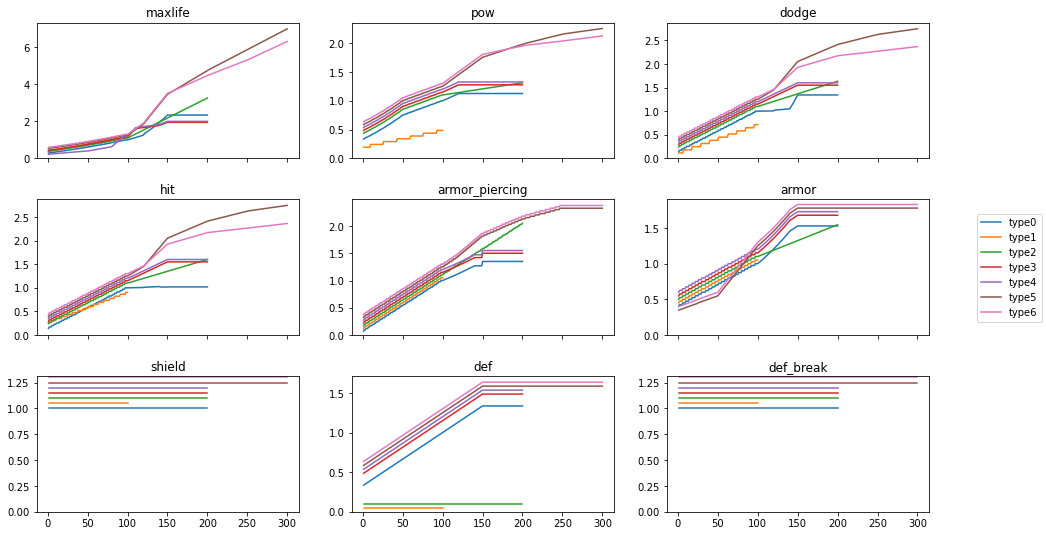

In [57]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)

fig, axes = plt.subplots(3,3,sharex=True)
for j,k in enumerate(standard_level.keys()):
    if k=='level':
        continue
    ax = axes[(j-1)//3,(j-1)%3]
    for i,g in enumerate(groups):
        ax.plot(g['level'],g[k]+0.05*i,label=f"type{i}")
    ax.set_ylim(bottom=0)
    ax.set_title(k)
plt.subplots_adjust(hspace=0.3)
plt.figlegend(*(axes[0,0].get_legend_handles_labels()), loc='center right')
plt.show()
        

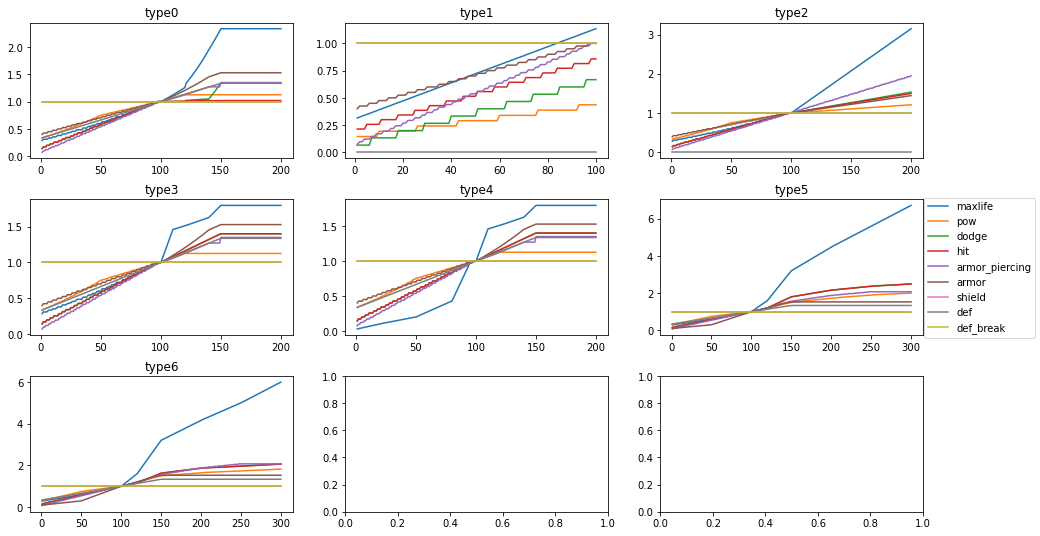

In [62]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)

fig, axes = plt.subplots(3,3)
for i,g in enumerate(groups):
    for j,k in enumerate(standard_level.keys()):
        if k=='level':
            continue
        ax = axes[i//3,i%3]
        ax.plot(g['level'],g[k],label=k)
        ax.set_title(f"type{i}")
plt.subplots_adjust(hspace=0.3)
plt.figlegend(*(axes[0,0].get_legend_handles_labels()), loc='center right')
plt.show()
        